In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_paths(data_file, stage_name):
    paths = []
    for i in range(5):
        path = os.path.join('..', 'results', 'result_{}'.format(i), data_file, 'results', '{}_k_{}.csv'.format(data_file, stage_name))
        paths.append(path)
    return paths

In [3]:
def get_df(paths, stage_name, data_name):
    list_df = []
    for p in paths:
        df = pd.read_csv(p)
        df = df.drop('Unnamed: 0', axis=1)
        list_df.append(df)
    df = pd.concat(list_df, axis=0, ignore_index=True)
    df['Stage'] = stage_name
    df['Dataset'] = data_name
    return df

In [4]:
df1 = get_df(get_paths('mnist_dnn', 's2'), 'Reliability', 'MNIST')
df2 = get_df(get_paths('mnist_dnn', 's3'), 'Decidability', 'MNIST')
df_mnist = pd.concat([df1, df2])

In [5]:
df1 = get_df(get_paths('cifar10_resnet', 's2'), 'Reliability', 'CIFAR-10')
df2 = get_df(get_paths('cifar10_resnet', 's3'), 'Decidability', 'CIFAR-10')
df_cifar = pd.concat([df1, df2])

In [6]:
df = pd.concat([df_mnist, df_cifar])
df = df.rename(columns={
    'acc': 'Accuracy',
    'fpr': 'FPR'
})
df

,k,Accuracy,FPR,Stage,Dataset
0,1,0.70850,0.015,Reliability,MNIST
1,2,0.71850,0.013,Reliability,MNIST
2,4,0.70275,0.015,Reliability,MNIST
3,6,0.70225,0.017,Reliability,MNIST
4,8,0.70200,0.019,Reliability,MNIST
...,...,...,...,...,...
90,150,0.14675,0.019,Decidability,CIFAR-10
91,160,0.14300,0.020,Decidability,CIFAR-10
92,170,0.14700,0.020,Decidability,CIFAR-10
93,180,0.14350,0.019,Decidability,CIFAR-10


In [7]:
cols = [
    # '#b166d0',  # magnet
    '#2196f3',  # rc
    # '#F9A825',  # lid
    '#ff1744',  # fs
    # '#4CAF50',  # baard
]

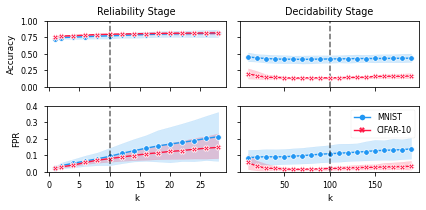

In [9]:
# sns.set_context('paper')
plt.style.use('seaborn-paper')

f, ax = plt.subplots(2, 2, figsize=(6, 3))

data = df[df['Stage']=='Reliability']
s1 = sns.lineplot(
    x='k', y='Accuracy', hue="Dataset", style='Dataset', markers=True, dashes=False, data=data, ax=ax[0,0], palette=cols)
s1.set(xlabel=None, xticklabels=[], ylabel='Accuracy')
s1.legend_.remove()
ax[0,0].set(ylim=(0, 1))
ax[0,0].axvline(x=10, linewidth=1.5, alpha=0.6, linestyle='--', c='black')

s2 = sns.lineplot(
    x='k', y='FPR', hue="Dataset", style='Dataset', markers=True, dashes=False, data=data, ax=ax[1,0], palette=cols)
s2.set(xlabel='k', ylabel='FPR')
s2.legend_.remove()
ax[0,1].set(ylim=(0, 1))
ax[0,1].axvline(x=100, linewidth=1.5, alpha=0.6, linestyle='--', c='black')

data = df[df['Stage']=='Decidability']
s3 = sns.lineplot(
    x='k', y='Accuracy', hue="Dataset", style='Dataset', markers=True, dashes=False, data=data, ax=ax[0,1], palette=cols)
s3.set(xlabel=None, ylabel=None, xticklabels=[], yticklabels=[])
s3.legend_.remove()
ax[1,0].set(ylim=(0, 0.4))
ax[1,0].axvline(x=10, linewidth=1.5, alpha=0.6, linestyle='--', c='black')

s4 = sns.lineplot(
    x='k', y='FPR', hue="Dataset", style='Dataset', markers=True, dashes=False, data=data, ax=ax[1,1], palette=cols)
s4.set(xlabel='l', ylabel=None, yticklabels=[])
ax[1,1].set(ylim=(0, 0.4))
ax[1,1].set_xlabel('k')
ax[1,1].axvline(x=100, linewidth=1.5, alpha=0.6, linestyle='--', c='black')

ax[0,0].title.set_text('Reliability Stage')
ax[0,1].title.set_text('Decidability Stage')
plt.tight_layout(pad=1)
#plt.legend(bbox_to_anchor=(-0.6, -0.71), loc='lower left', ncol=2)
plt.legend()

plt.savefig('K.pdf', format='pdf', dpi=1200, bbox_inches='tight')